# Práctica 2 | Tecnologías de la Imagen y Vídeo
## Operadores locales y detección de bordes

In [139]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from scipy.ndimage import convolve, correlate, uniform_filter, gaussian_filter, median_filter, rotate
from scipy.ndimage import prewitt, sobel, laplace

from skimage import filters
from skimage.data import camera
from skimage.util import random_noise
from skimage import feature

### Apartado 1) Leer y representar la imagen "gray_bands.tif".

(ancho, alto) = (7200, 2400)


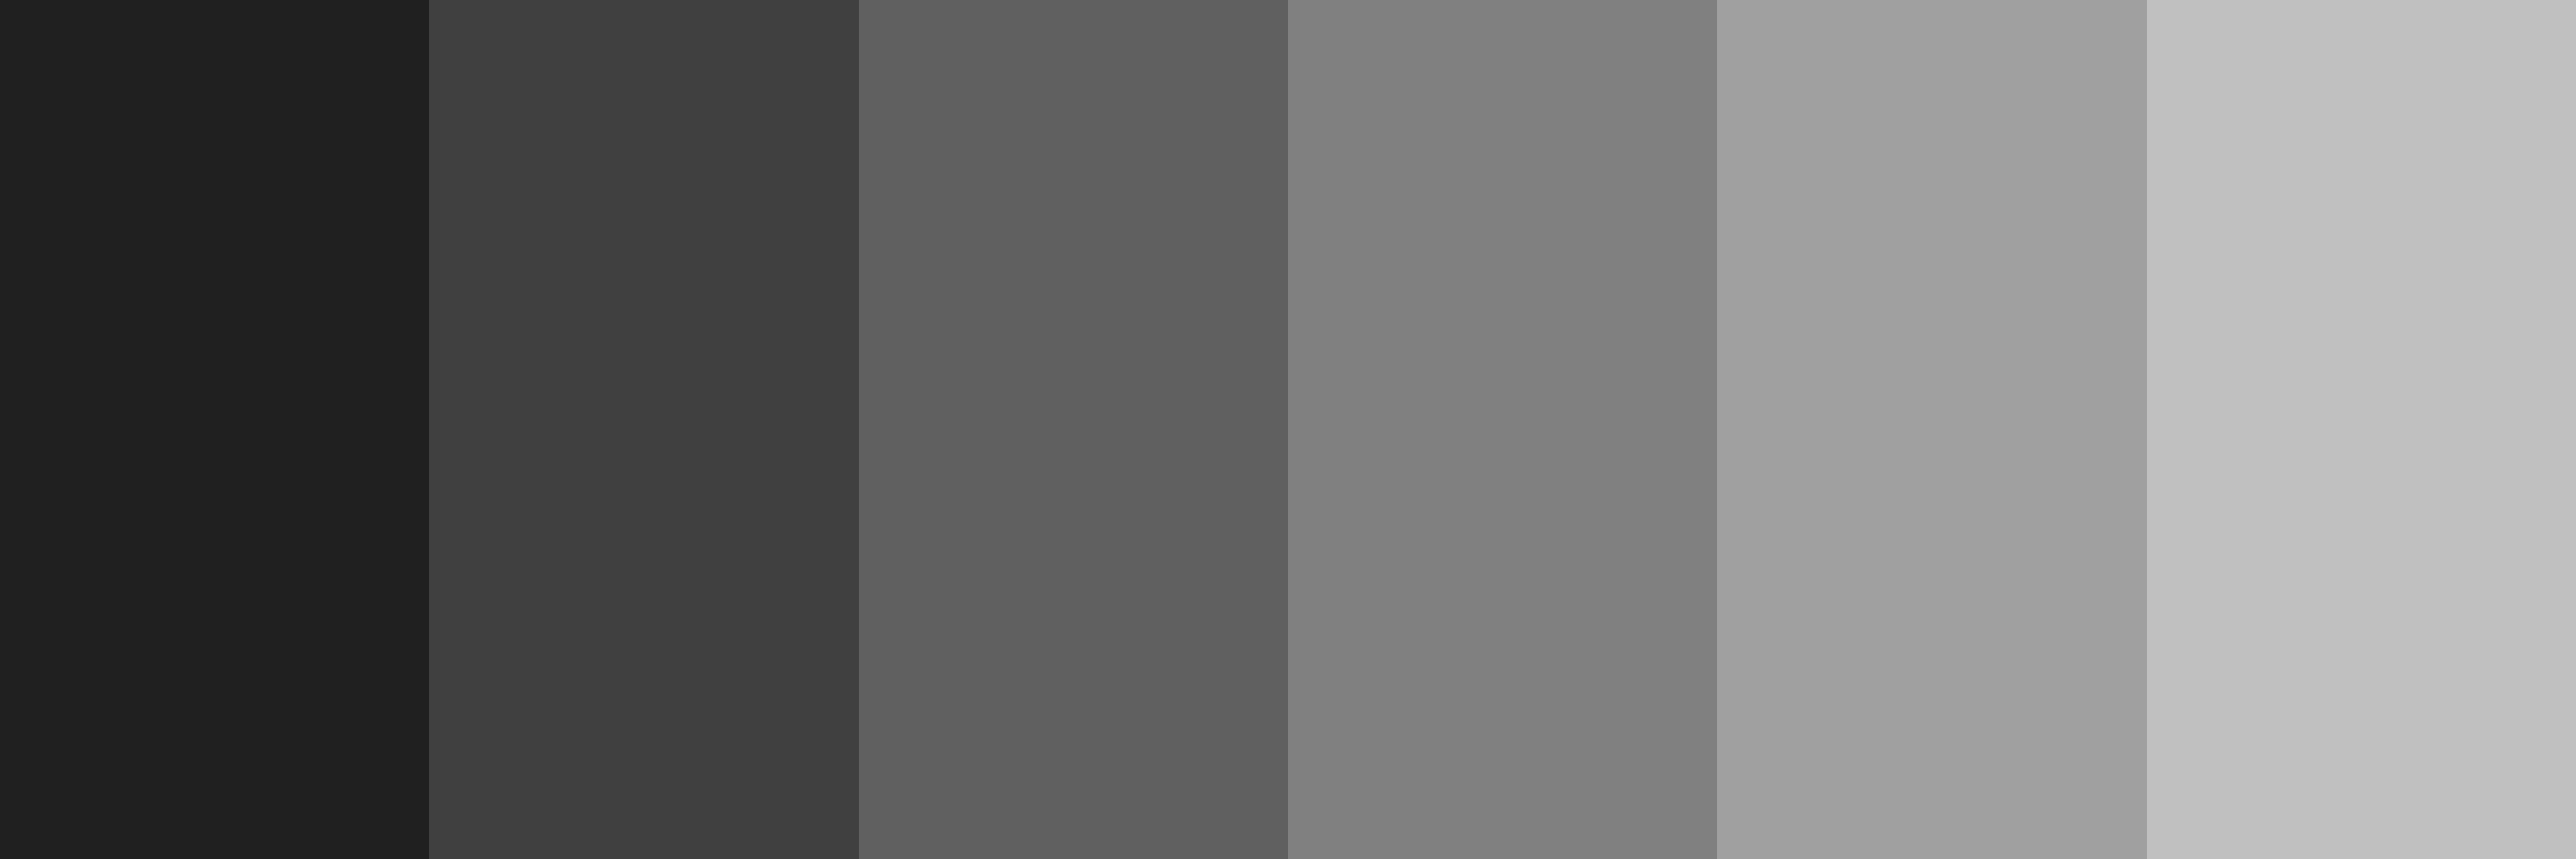

In [140]:
file = 'images/gray_bands.tif'
img  = Image.open(file)
print('(ancho, alto) =', img.size)
display(img)

Voy a reescalar la imagen, porque al aplicar los operadores (especialmente el operador de gradiente de Prewitt) me ha dado problemas el tiempo de ejecución (runtime).

In [141]:
img = img.resize(size =(1800,600))

### Apartado 2) Detectar y representar los bordes con un operador de gradiente.

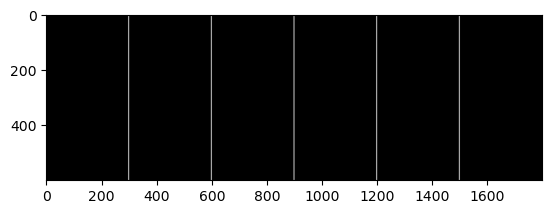

In [142]:
#Operador de gradiente Prewitt
gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
gy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
img_gx = convolve(img, gx)
img_gy = convolve(img, gy)
img_prewitt = np.sqrt(img_gx**2 + img_gy**2)

plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

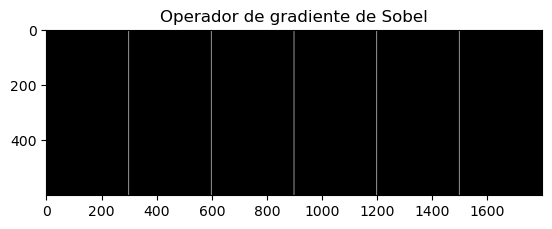

In [143]:
#Operador de gradiente de Sobel
plt.title('Operador de gradiente de Sobel')
plt.imshow(sobel(img),cmap='gray')

Con el operador de gradiente, se ha conseguido detectar el borde correctamente. Se ha utilizado tanto el operador de gradiente de Prewitt como el de Sobel.

### Apartado 3) Detectar y representar los bordes con el operador de laplaciana

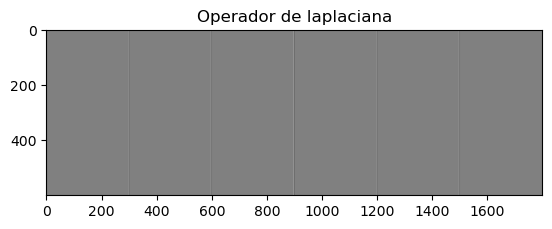

In [144]:
img = np.array(img, dtype='float')
img = img/img.max()
img_lpl = laplace(img)

plt.title('Operador de laplaciana')
plt.imshow(img_lpl, cmap='gray')

En este caso el borde también se está detectando, pero es menos perceptible por la poca diferencia de intensidad con el fondo de la imagen.

### Apartado 4) Añadir ruido gaussiano a la imagen, de media cero y de desviación típica configurable por el usuario. Representar las imágenes.

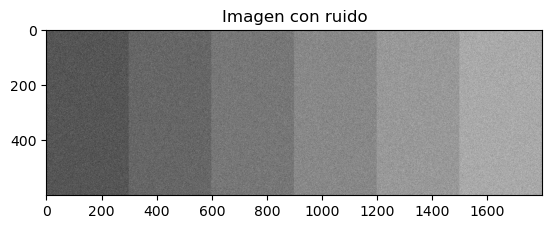

In [145]:
desvtipica = 0.2
img = img + np.random.normal(0.0, desvtipica, img.shape)
plt.title('Imagen con ruido')
plt.imshow(img, cmap='gray')

Ahora las franjas no son completamente lisas, lo cual dificultará la detección de bordes

### Apartado 5) Aplicar los operadores de gradiente y laplaciana a las imágenes ruidosas. ¿Podemos detectar los bordes? Discutir el resultado.

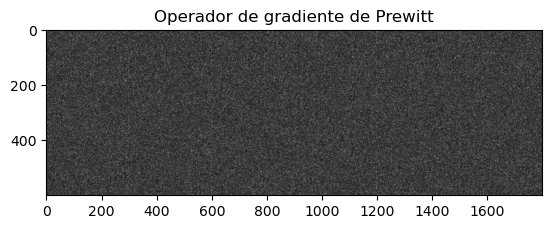

In [146]:
#Operador de gradiente de Prewitt
img_gx = convolve(img, gx)
img_gy = convolve(img, gy)
img_prewitt = np.sqrt(img_gx**2 + img_gy**2)

plt.title('Operador de gradiente de Prewitt')
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

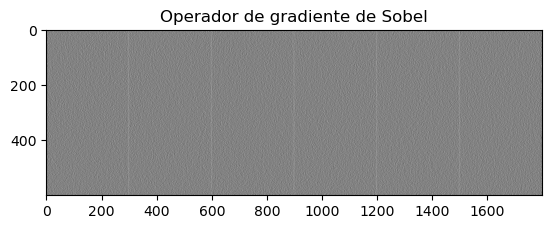

In [147]:
#Operador de gradiente de Sobel
plt.title('Operador de gradiente de Sobel')
plt.imshow(sobel(img),cmap='gray')

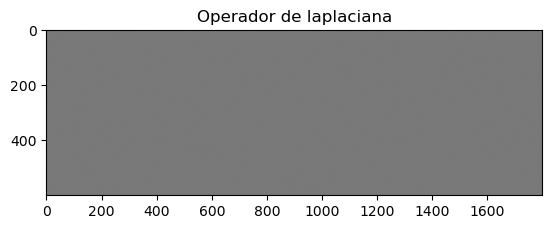

In [148]:
#Operador de laplaciana
img = np.array(img, dtype='float')
img = img/img.max()
img_lpl = laplace(img)
plt.title('Operador de laplaciana')
plt.imshow(img_lpl, cmap='gray')

Teniendo ruido la imagen, no ha sido posible detectar los bordes de manera sencilla como en la situación inicial. El operador de gradiente de Sobel es el que mejor lo ha conseguido.

### Apartado 6) Aplicar un filtrado Gaussiano a la imagen antes de aplicar los operadores anteriores. ¿Podemos ahora detectar los bordes? Discutir el resultado.

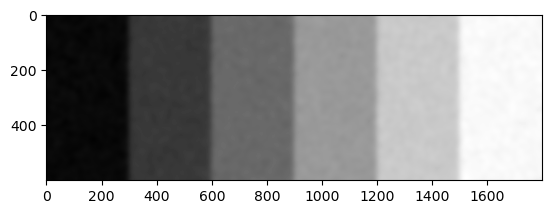

In [149]:
img = gaussian_filter(img, 10)
plt.imshow(img, cmap='gray')

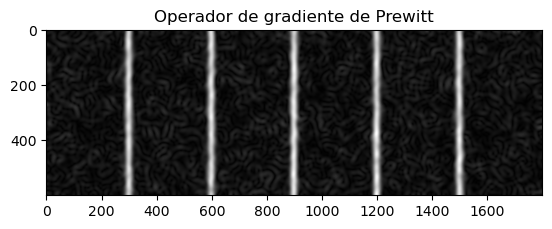

In [150]:
#Operador de gradiente de Prewitt
img_gx = convolve(img, gx)
img_gy = convolve(img, gy)
img_prewitt = np.sqrt(img_gx**2 + img_gy**2)

plt.title('Operador de gradiente de Prewitt')
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

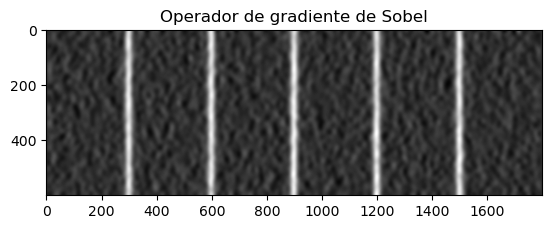

In [151]:
#Operador de gradiente de Sobel
plt.title('Operador de gradiente de Sobel')
plt.imshow(sobel(img),cmap='gray')

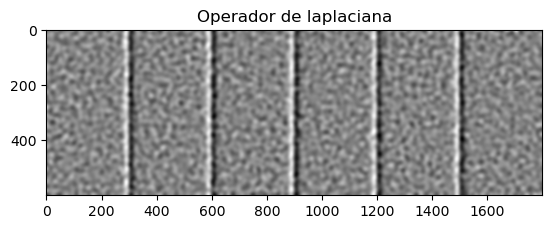

In [152]:
#Operador de laplaciana
img = np.array(img, dtype='float')
img = img/img.max()
img_lpl = laplace(img)
plt.title('Operador de laplaciana')
plt.imshow(img_lpl, cmap='gray')

Ahora sí detecta los bordes, pero dentro de las franjas también detecta parte del ruido

### Apartado 7) La detección de bordes se resuelve con métodos que se fundamentan en lo visto en los apartados anteriores. Un algoritmo muy conocido es el detector de Canny, que se ha presentado en clase. Aplicarlo a las dos imágenes reales ("building.tif" y "head_CT.tif"). Discutir el resultado y los parámetros empleados.

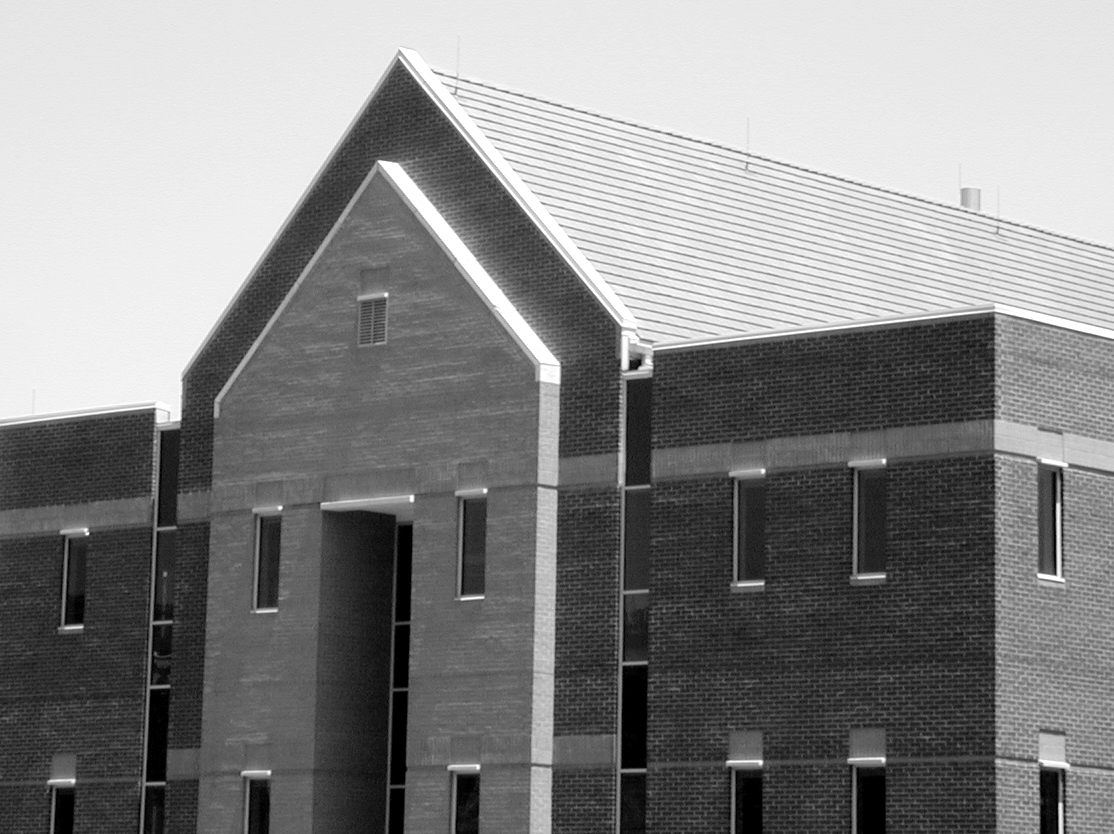

In [153]:
file = 'images/building.tif'
img  = Image.open(file)
display(img)

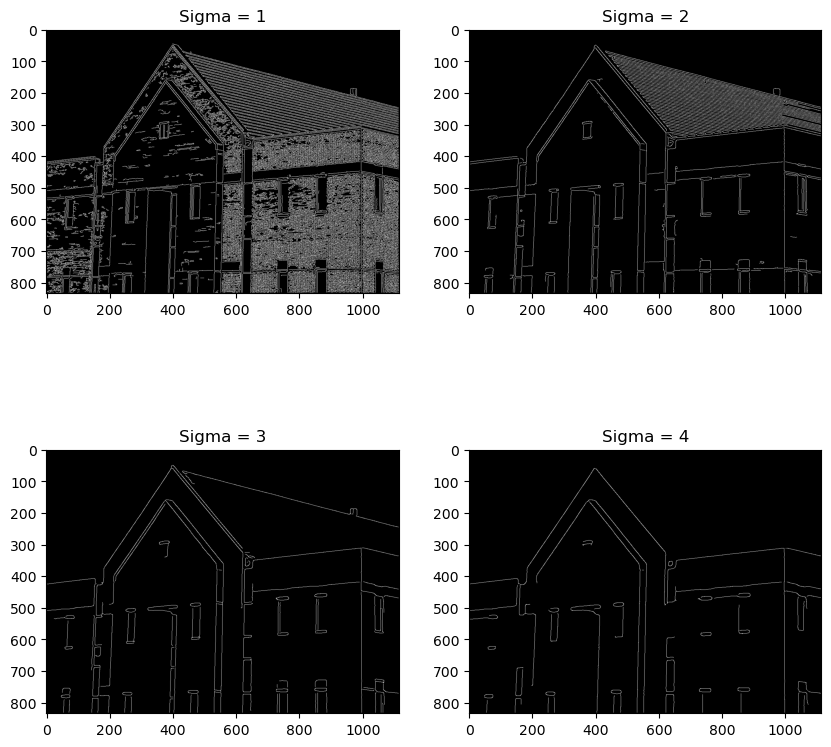

In [154]:
img = np.array(img, dtype='uint8')
edges1 = feature.canny(img, sigma=1)
edges2 = feature.canny(img, sigma=2)
edges3 = feature.canny(img, sigma=3)
edges4 = feature.canny(img, sigma=4)

plt.figure(figsize = (10,10))

plt.subplot(221)
plt.title('Sigma = 1')
plt.imshow(edges1, cmap='gray')
plt.subplot(222)
plt.title('Sigma = 2')
plt.imshow(edges2, cmap='gray')
plt.subplot(223)
plt.title('Sigma = 3')
plt.imshow(edges3, cmap='gray')
plt.subplot(224)
plt.title('Sigma = 4')
plt.imshow(edges4, cmap='gray')

En esta primera imagen aplicando el detector de Canny, se obtienen muy buenos resultados en la detección de bordes. Destaca el resultado al aplicar sigma=2. Muestro, a continuación, en grande, este resultado:

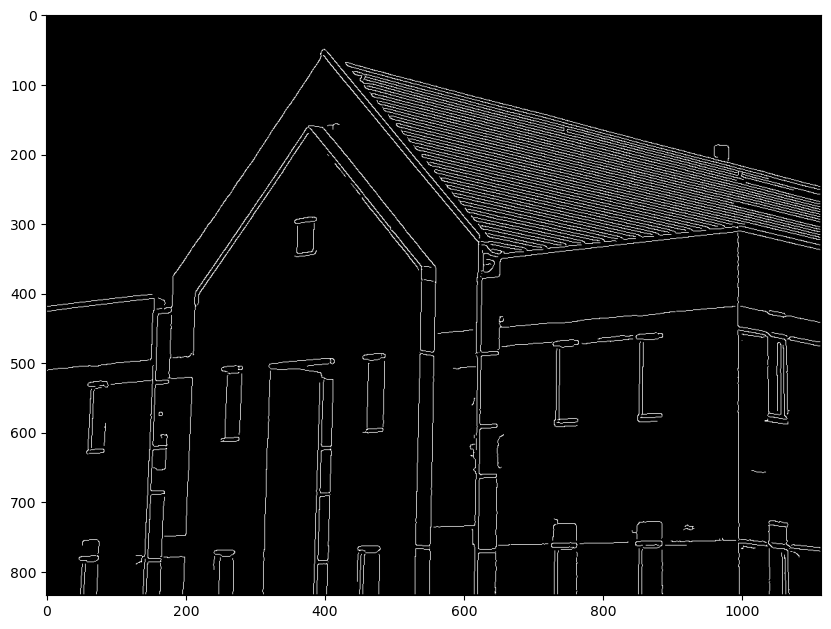

In [155]:
plt.figure(figsize = (10,10))
plt.imshow(edges2, cmap='gray')

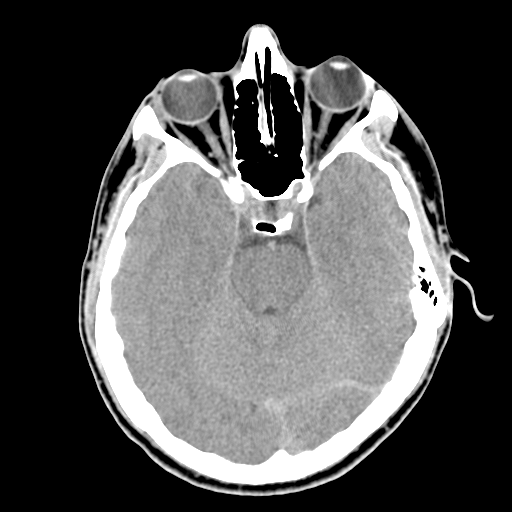

In [156]:
file = 'images/head_CT.tif'
img  = Image.open(file)
display(img)

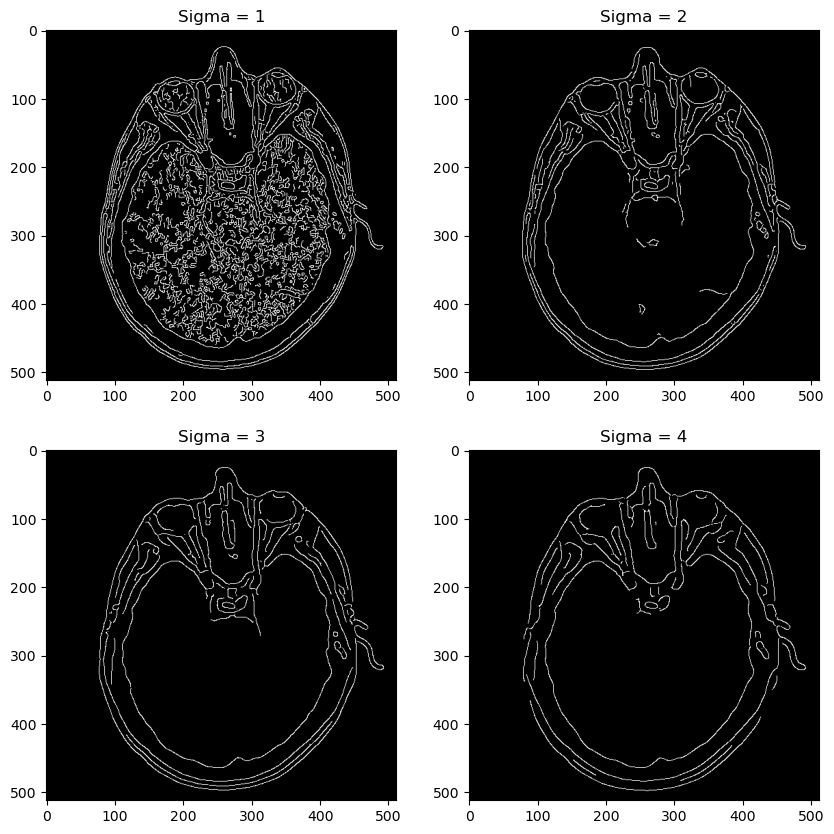

In [157]:
img = np.array(img, dtype='uint8')
edges1 = feature.canny(img, sigma=1)
edges2 = feature.canny(img, sigma=2)
edges3 = feature.canny(img, sigma=3)
edges4 = feature.canny(img, sigma=4)

plt.figure(figsize = (10,10))

plt.subplot(221)
plt.title('Sigma = 1')
plt.imshow(edges1, cmap='gray')
plt.subplot(222)
plt.title('Sigma = 2')
plt.imshow(edges2, cmap='gray')
plt.subplot(223)
plt.title('Sigma = 3')
plt.imshow(edges3, cmap='gray')
plt.subplot(224)
plt.title('Sigma = 4')
plt.imshow(edges4, cmap='gray')

Para la imagen del cráneo también se obtienen muy buenos resultados en la detección de bordes, especialmente al aplicar sigma=3. Muestro, a continuación, en grande, este resultado:

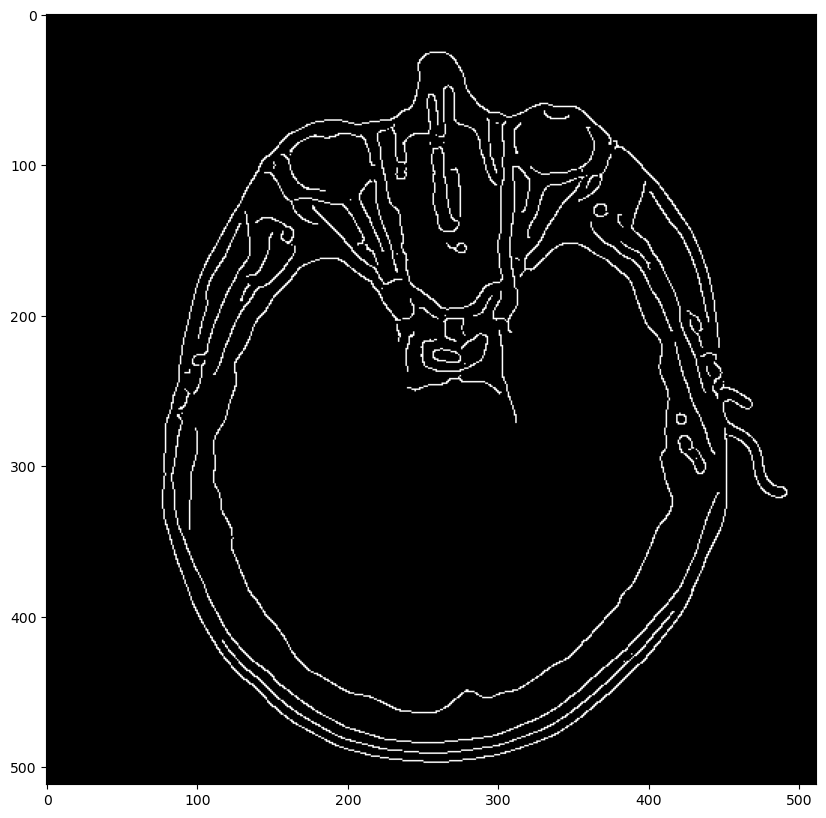

In [158]:
plt.figure(figsize = (10,10))
plt.imshow(edges3, cmap='gray')